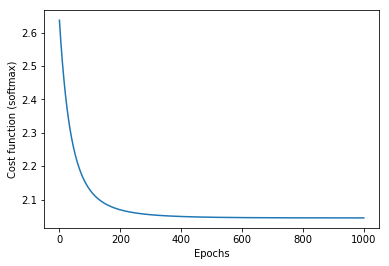

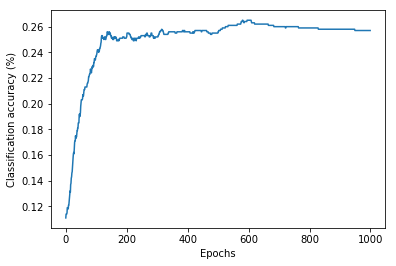

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from numpy import array, dot, random
from random import choice
#from __future__ import braces


def unpickle( file ):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

data = unpickle( 'cifar-10-batches-py/data_batch_1' )

features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T

N = 1000
D = 10
 
# only keep N items
features = features[ 0:N, : ] 
labels = labels[ 0:N, : ]
 
# project down into a D-dimensional space
features = np.dot( features, np.random.randn( 3072, D) )
 
# whiten our data - zero mean and unit standard deviation
features = (features - np.mean(features, axis=0)) / np.std(features, axis=0)

# Compute accuracy as correct classifications / total instances
def get_accuracy(W):
    score_matrix = score_function()
    correct_cnt = 0
    for i in range(0,N):
        if (np.argmax(score_matrix[:,i]) == labels[i]):
            correct_cnt += 1  
    accuracy = (1.0 * correct_cnt) / N
    return accuracy

# Compute the numerical gradient
def numerical_gradient(Loss, W):
    delta = 0.000001
    gradient = np.zeros((D,D))
    for i in range(0,W.shape[0]):
        for j in range(0,W.shape[1]):
            W[i,j] += delta      # Add in delta to W matrix
            delta_loss = loss_function(W)
            W[i,j] -= delta      # Subtract it back out to get original W matrix
            df_dx = (delta_loss - Loss)/delta  # Compute derivative
            gradient[i,j] = df_dx
    return Loss, gradient
    
# Vectorized loss function
def loss_function(W):
    # Get score matrix (10x1000)
    score_matrix = score_function()
    
    # Compute exp(score_matrix[i,j]) for each i,j
    exp_score_matrix = np.exp(score_matrix)

    # Normalize each column to sum to 1
    normalized_score_matrix = exp_score_matrix / exp_score_matrix.sum(axis=0)[None,:]

    # NumPy array from 0 to 999. To be used to index into normalized_score_matrix
    indices = np.arange(N)
    
    # Get probability of the entries in each column that correspond to the actual label
    L_vec = normalized_score_matrix[labels.T, indices]

    # Take the negative log to
    L_vec_neg_log = -1.0 * np.log(L_vec.T)
    
    # Loss is mean of each 
    Loss = np.mean(L_vec_neg_log)
    return Loss

def score_function():
    score_matrix = W.dot(features.T)
    return score_matrix
    

# Weight matrix
W = np.random.rand(D, D);

loss_over_time = np.zeros(N)
accuracy_over_time = np.zeros(N)

step_size = 0.1
NUM_EPOCHS = 1000
for i in range(0,NUM_EPOCHS):
    loss_function_value, grad = numerical_gradient( loss_function(W), W )
    accuracy = get_accuracy(W)
    # print str(i) + ": " + str(loss_function_value) + " -- " + str(accuracy) # Debug print
    loss_over_time[i] = loss_function_value
    accuracy_over_time[i] = accuracy
    W = W - step_size * grad
    
# Plot the cost
plt.figure(1)
plt.plot(loss_over_time)
plt.xlabel("Epochs")
plt.ylabel("Cost function (softmax)")

# Plot the accuracy
plt.figure(2)
plt.plot(accuracy_over_time)
plt.xlabel("Epochs")
plt.ylabel("Classification accuracy (%)")

# Show both plots
plt.show()